# UPC Quantum Engineering Final Project: Quantum Channel Discrimination
## II. One-shot discrimination Base circuit

In [37]:
from itertools import product, combinations
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, iplot_state_qsphere, iplot_bloch_multivector
from qiskit import Aer, execute
from numpy import pi
from math import e
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Create 2 qbits circuit and 1 output classical bit
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
T = 10  # Points of Theta angle (pi) in Bloch sphere - min 2
P = 20  # Points of Phase angle (2*pi) in Bloch sphere - min 2
angle = pi/1.5  # Angle used for CY gate
cycles = 5000  # Number of iterations in execution

# Quantum states to pass through the circuit
# We want to pass the Bloch sphere through it to see visually the transformation
# First we generate the angles which will help the draw the sphere
Theta = np.mgrid[0:pi:T*1j]
Phase = np.mgrid[0:2*pi:P*1j]
# As we have to provide the state values to initialize the qreg[0] we have to do a conversion
# from angles in the sphere to statevector amplitudes. These statevectors will be the combination of
# Zero_Amplitude*|0> plus One_Amplitude*|1>
Zero_Amplitude = [0]*T*P
One_Amplitude = [0]*T*P
Zero_AmplitudeF = [0]*T*P
One_AmplitudeF = [0]*T*P

In [34]:
print('Preparing states to pass through the circuit')
for a in range(len(Theta)):
    for b in range(len(Phase)):
        Zero_Amplitude[a*P+b] = math.cos(Theta[a]/2)
        One_Amplitude[a*P+b] = math.sin(Theta[a]/2)*e**(1j*Phase[b])
# List of Initial States
#        print("State ", a*P+b," =", Zero_Amplitude[a*P+b],"*|0> + ", One_Amplitude[a*P+b], "*|1>")

# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

totalResults = []
totalCounts = []
totalCircuits = []
totalStateVectors = []

Preparing states to pass through the circuit


In [35]:
print("Defining the circuit")
# Create the circuit gates
# Not used as we defined the angle and don't iterate circuits
# print("Starting to compute the angle: ", math.degrees(theta))

# Initialize circuit with desired initial_state
print("Initializing the circuit")

for i in range(len(Zero_Amplitude)):
    circuit = QuantumCircuit(qreg_q, creg_c)
    circuit.initialize([Zero_Amplitude[i], One_Amplitude[i]], qreg_q[0])
   #print("Input State ", i, " =",
    #      np.round(Zero_Amplitude[i], 3), "*|0> + ", np.round(One_Amplitude[i],3), "*|1>")
    circuit.reset(qreg_q[1])
    circuit.cry(angle, qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.measure(qreg_q[0], creg_c[0])
    totalCircuits.append(circuit)
    # execute circuit on backends
    job_sim = execute(circuit, backend_sim, shots=cycles)
    job = execute(circuit, backend, shots=cycles)
    # get results
    result = job.result()
    results_sim = job_sim.result()
    outputState = result.get_statevector(circuit, decimals=3)
    totalStateVectors.append(outputState);
    #print("Output State Vector: ", outputState)
    totalResults.append(results_sim)
    counts = results_sim.get_counts(circuit)
    # print(counts)
    Zero_AmplitudeF[i] = np.sqrt(counts['0']/cycles)
    One_AmplitudeF[i] = np.sqrt((cycles-counts['0'])/cycles)
    #print("Output State ", i, " =",
    #      np.round(Zero_AmplitudeF[i],3), "*|0> + ", np.round(One_AmplitudeF[i],3), "*|1>")
    totalCounts.append(counts)

Defining the circuit
Initializing the circuit


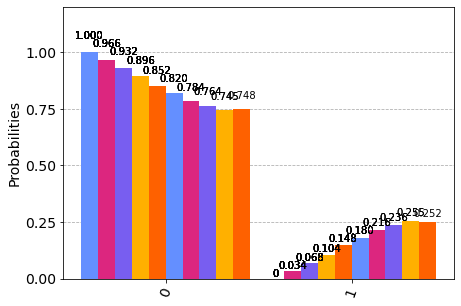

In [36]:
plot_histogram([totalCounts[0], totalCounts[int((len(totalCounts)/10)*2)], totalCounts[int((len(totalCounts)/10)*3)], totalCounts[int((len(totalCounts)/10)*4)], totalCounts[int((len(totalCounts)/10)*5)], totalCounts[int((len(totalCounts)/10)*6)],totalCounts[int((len(totalCounts)/10)*7)], totalCounts[int((len(totalCounts)/10)*8)], totalCounts[int((len(totalCounts)/10)*9)], totalCounts[(int((len(totalCounts)/10)*10))-1]])

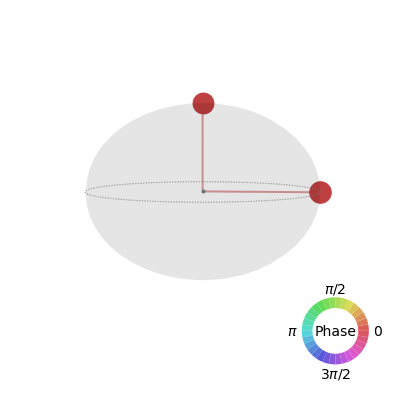

In [44]:
plot_state_qsphere(totalStateVectors[100])

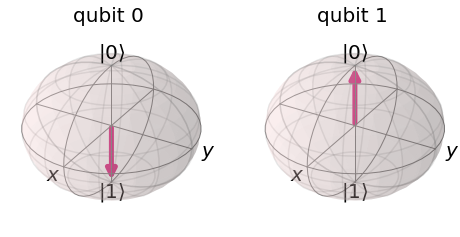

In [50]:
plot_bloch_multivector(totalStateVectors[197])

In [51]:
from qiskit.tools.visualization import iplot_bloch_multivector

In [52]:
iplot_bloch_multivector(totalStateVectors[197])

In [49]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.u3(pi/2,pi/2,pi/2,q)
qc.draw()

┌────────────────────┐
q3_0: ┤ U3(pi/2,pi/2,pi/2) ├
      └────────────────────┘